<h1>Introduction </h1>
Proyek Akhir CascadePEOW

IDE :
membuat model yang dapat memprediksi situasi positif aktif harian covid selama 1 bulan kedepan

Deskripsi :
menggunakan data-data yang ada, membuat dan memilih feature yang paling berdampak untuk memodelkan situasi pandemi covid dengan output (y) adalah positif aktif harian covid. 

#<h3> Getting the data </h3>

All Dataset : https://drive.google.com/drive/folders/1c02YJCWh21x5qKxs8vAMQiQalZXPPrAb?usp=sharing <br>                          
- Mobility Data (Apple) : https://covid19.apple.com/mobility
- Mobility Data (Google): https://www.google.com/covid19/mobility/ 
- Vaksinasi             : https://vaksin.kemkes.go.id/#/vaccines 
- Positif Aktif :
- Positif Harian :
- Isolasi Mandiri & Vaksinasi jakarta : https://tiny.cc/Datacovidjakarta

In [183]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
pip install plotly

#<h2>Preprocessing</h2>


### Mobility Data (Apple) -> Indonesia
Date : 2020-01-13 to 2021-08-23


In [66]:
# df_apple_mobility = pd.read_csv('/content/drive/MyDrive/Projects/Dataset/mobility_apple.csv')
df_apple_mobility = pd.read_csv('/content/drive/MyDrive/Data Science Study/Projects/Dataset/mobility_apple.csv')
df_apple_mobility.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25,2021-07-26,2021-07-27,2021-07-28,2021-07-29,2021-07-30,2021-07-31,2021-08-01,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16,2021-08-17,2021-08-18,2021-08-19,2021-08-20,2021-08-21,2021-08-22,2021-08-23
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,250.37,271.72,268.21,263.83,243.24,251.90,278.22,297.08,315.51,330.00,349.02,330.53,315.20,318.61,320.01,347.67,379.06,385.03,369.97,359.48,367.48,397.45,409.22,424.75,408.65,445.31,432.02,425.92,427.53,445.61,440.19,429.67,445.62,423.46,408.55,411.35,423.65,404.54,391.96,369.88
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,236.29,244.01,234.80,202.00,223.75,226.65,260.72,265.93,284.18,273.39,253.82,291.86,270.02,276.76,269.64,285.67,295.10,281.36,321.45,305.67,315.95,322.90,357.65,336.55,316.97,359.91,362.22,373.30,361.54,355.05,355.78,318.93,379.10,368.40,360.98,363.16,364.09,342.81,296.97,334.54
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,87.62,110.41,119.97,76.00,84.39,104.62,87.91,95.23,116.22,122.68,75.03,79.49,81.46,83.51,87.12,107.44,121.10,76.60,69.50,73.32,75.93,79.32,107.97,130.56,60.93,67.70,72.97,77.70,83.78,115.24,137.72,103.02,83.04,74.66,79.03,79.81,105.67,124.29,78.22,70.24
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,75.18,89.34,90.67,50.82,73.40,92.07,75.92,82.94,100.50,90.21,52.75,70.94,71.21,70.80,76.64,89.37,92.05,53.20,64.84,70.74,68.89,70.38,93.11,100.36,39.50,59.79,67.47,69.68,74.27,93.41,109.55,74.71,59.85,70.33,73.13,72.57,95.44,95.20,56.09,65.87
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,96.91,82.88,67.98,79.44,78.88,78.63,80.76,84.23,76.98,61.62,72.95,76.87,89.22,93.40,98.98,97.09,70.08,80.33,82.22,85.13,86.43,78.32,66.63,55.40,75.12,78.55,80.66,83.20,87.03,83.47,68.26,77.28,77.72,79.80,81.58,86.38,78.02,63.23,74.92,75.37


In [67]:
df_apple_mobility.isnull().sum()

geo_type                  0
region                    0
transportation_type       0
alternative_name       3647
sub-region             1362
                       ... 
2021-08-19               39
2021-08-20               39
2021-08-21               39
2021-08-22               39
2021-08-23               39
Length: 595, dtype: int64

In [68]:
df_apple_mobility.drop(labels=['geo_type', 'alternative_name', 'sub-region', 'country'], axis=1, inplace=True)

In [69]:
df_apple_mobility.drop(df_apple_mobility.index[df_apple_mobility['transportation_type'] == 'transit'], inplace = True)

In [70]:
df_apple_mobility.isnull().sum()

region                  0
transportation_type     0
2020-01-13             39
2020-01-14             39
2020-01-15             39
                       ..
2021-08-19             39
2021-08-20             39
2021-08-21             39
2021-08-22             39
2021-08-23             39
Length: 591, dtype: int64

In [71]:
df_apple_mobility = df_apple_mobility.melt(id_vars=["region", "transportation_type"], 
        var_name="Date", 
        value_name="Value")

In [72]:
df_apple_mobility.isnull().sum()

region                     0
transportation_type        0
Date                       0
Value                  33800
dtype: int64

In [73]:
df_apple_mobility.dropna(inplace=True)

df_apple_mobility.isna().sum()

region                 0
transportation_type    0
Date                   0
Value                  0
dtype: int64

In [74]:
df_apple_mobility

,region,transportation_type,Date,Value
0,Albania,driving,2020-01-13,100.00
1,Albania,walking,2020-01-13,100.00
2,Argentina,driving,2020-01-13,100.00
3,Argentina,walking,2020-01-13,100.00
4,Australia,driving,2020-01-13,100.00
...,...,...,...,...
2438455,York County,walking,2021-08-23,218.29
2438456,Young County,driving,2021-08-23,151.22
2438457,Yuba County,driving,2021-08-23,151.37
2438458,Yuma County,driving,2021-08-23,118.54


In [75]:
df_indonesia = df_apple_mobility[df_apple_mobility.region == 'Indonesia']
df_cleaned_indonesia_mobility = df_indonesia
df_cleaned_indonesia_mobility

,region,transportation_type,Date,Value
48,Indonesia,driving,2020-01-13,100.00
49,Indonesia,walking,2020-01-13,100.00
4188,Indonesia,driving,2020-01-14,100.95
4189,Indonesia,walking,2020-01-14,100.61
8328,Indonesia,driving,2020-01-15,103.17
...,...,...,...,...
2426089,Indonesia,walking,2021-08-21,91.70
2430228,Indonesia,driving,2021-08-22,99.71
2430229,Indonesia,walking,2021-08-22,76.76
2434368,Indonesia,driving,2021-08-23,91.03


In [76]:
df_cleaned_indonesia_mobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 48 to 2434369
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               1172 non-null   object 
 1   transportation_type  1172 non-null   object 
 2   Date                 1172 non-null   object 
 3   Value                1172 non-null   float64
dtypes: float64(1), object(3)
memory usage: 45.8+ KB


In [77]:
df_cleaned_indonesia_mobility['Date'] = pd.to_datetime(df_cleaned_indonesia_mobility['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


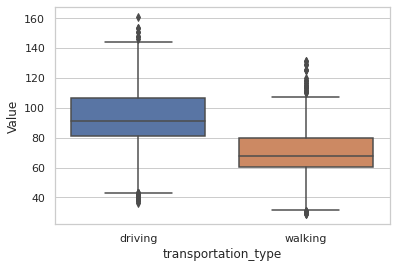

In [78]:
sns.set(style='whitegrid')
 
sns.boxplot(x="transportation_type",
                y="Value",
                data=df_cleaned_indonesia_mobility)

In [79]:
df_cleaned_indonesia_mobility.set_index('Date', inplace = True)

In [80]:
df_cleaned_indonesia_mobility.head()

,region,transportation_type,Value
Date,,,
2020-01-13,Indonesia,driving,100.00
2020-01-13,Indonesia,walking,100.00
2020-01-14,Indonesia,driving,100.95
2020-01-14,Indonesia,walking,100.61
2020-01-15,Indonesia,driving,103.17


In [81]:
# df_cleaned_indonesia_mobility.to_csv('/content/drive/MyDrive/Projects/Dataset/cleaned_apple_indonesia_mobility.csv', index = False)

##<h3>Vaksinasi -> Indonesia</h3>
Date : 2021-07-04 to 2021-06-24	

In [82]:
df_vaksinasi = pd.read_csv('/content/drive/MyDrive/Data Science Study/Projects/Dataset/Jumlah_Divaksin_Pertama_Nasional_data_monitor__data.csv')
df_vaksinasi = df_vaksinasi[['Provinsi','Kategori','Region','Tanggal','Divaksin','Divaksin 1','Divaksin 2']]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
df_vaksinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841089 entries, 0 to 841088
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Provinsi    841089 non-null  object
 1   Kategori    841089 non-null  object
 2   Region      841089 non-null  object
 3   Tanggal     841089 non-null  object
 4   Divaksin    841089 non-null  int64 
 5   Divaksin 1  841089 non-null  int64 
 6   Divaksin 2  841089 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 44.9+ MB


In [84]:
df_vaksinasi.rename(columns={'Divaksin 1':'vaksin_1',
                             'Divaksin 2':'vaksin_2',
                             'Divaksin':'total_vaksin'},inplace=True)

In [85]:
# rename labels on Province 
df_vaksinasi.rename({'Jawa Tengah':'Central Java',
                                  'Kalimantan Tengah':'Central Kalimantan',
                                  'Sulawesi Tengah':'Central Sulawesi',
                                  'Jawa Timur':'East Java',
                                  'Kalimantan Timur':'East Kalimantan',
                                  'Nusa Tenggara Timur':'East Nusa Tenggara',
                                  'Kalimantan Utara':'North Kalimantan',
                                  'Maluku Utara':'North maluku',
                                  'Sulawesi Utara':'North Sulawesi',
                                  'Sumatra Utara':'North Sumatra',
                                  'Kalimantan Selatan':'South Kalimantan',
                                  'Sulawesi Selatan':'South Sulawesi',
                                  'Sumatra Selatan':'South Sumatra',
                                  'Jawa Barat':'West Java',
                                  'Kalimantan Barat':'West Kalimantan',
                                  'Nusa Tenggara Barat':'West Nusa Tenggara',
                                  'Papua Barat':'West Papua',
                                  'Sulawesi Barat':'West Sulawesi',
                                  'Sumatra Barat':'West Sumatra',  
                                  'Kepulauan Bangka Belitung' : 'Bangka Belitung Islands',
                                  'Yogyakarta' : 'Special Region of Yogyakarta',
                                  'Kepulauan Riau' : 'Riau Islands',
                                  'Sulawesi Tenggara' : 'South East Sulawesi',
                     'DKI Jakarta':'Jakarta'},inplace=True)

In [86]:
df_vaksinasi[df_vaksinasi['Provinsi']=='DKI JAKARTA'].shape

(57, 7)

In [87]:
df_vaksinasi[df_vaksinasi['Provinsi']=='DKI Jakarta'].shape

(27067, 7)

In [88]:
df_vaksinasi['Provinsi']=df_vaksinasi['Provinsi'].str.replace('DKI JAKARTA','DKI Jakarta')

In [89]:
df_vaksinasi['Provinsi'].unique()

array(['Aceh', 'Jawa Barat', 'Banten', 'DKI Jakarta', 'Sulawesi Barat',
       'Bali', 'Jambi', 'Jawa Timur', 'Sulawesi Selatan', 'Maluku Utara',
       'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua',
       'Papua Barat', 'Lampung', 'Maluku', 'Riau', 'Sumatera Utara',
       'Kalimantan Selatan', 'Kalimantan Tengah', 'Sumatera Selatan',
       'Jawa Tengah', 'Kalimantan Barat', 'Sulawesi Utara',
       'Sumatera Barat', 'Kalimantan Timur', 'Kepulauan Riau',
       'Yogyakarta', 'Sulawesi Tengah', 'Bengkulu', 'Sulawesi Tenggara',
       'Kalimantan Utara', 'Kepulauan Bangka Belitung', 'Gorontalo'],
      dtype=object)

In [90]:
df_vaksinasi.set_index('Tanggal', inplace = True)

In [91]:
df_vaksinasi.head()

,Provinsi,Kategori,Region,total_vaksin,vaksin_1,vaksin_2
Tanggal,,,,,,
7/4/2021,Aceh,Menunggu Konfirmasi,Sumatera,116,115,1
7/4/2021,Aceh,Menunggu Konfirmasi,Sumatera,14,14,0
7/4/2021,Aceh,Menunggu Konfirmasi,Sumatera,66,66,0
7/4/2021,Aceh,Menunggu Konfirmasi,Sumatera,26,26,0
7/4/2021,Aceh,Menunggu Konfirmasi,Sumatera,58,58,0


In [92]:
# visualize on google data studio


In [93]:
df_vaksinasi_jakarta = df_vaksinasi[df_vaksinasi['Provinsi'] == 'DKI JAKARTA']
df_vaksinasi_jakarta.head()

,Provinsi,Kategori,Region,total_vaksin,vaksin_1,vaksin_2
Tanggal,,,,,,


## <h3>Mobility Data (Google) -> Indonesia & Jakarta</h3>
Date : 2021-01-01 to 2021-08-17


In [124]:
mobility_indonesia = pd.read_csv('/content/drive/MyDrive/Data Science Study/Projects/Dataset/2021_ID_Region_Mobility_Report.csv')
mobility_indonesia.sample(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
3465,ID,Indonesia,Lampung,NaN,NaN,ID-LA,NaN,ChIJpyKsUwF2Oy4RmrCJX8dYO48,2021-01-31,-21,-3,-25,-38.0,-11,8
1423,ID,Indonesia,Central Java,NaN,NaN,ID-JT,NaN,ChIJ3RjVnJt1ZS4RRrztj53Rd8M,2021-02-19,-20,-7,-34,-35.0,-29,8
5187,ID,Indonesia,Riau,NaN,NaN,ID-RI,NaN,ChIJdz6xGVhXJy4Rsb21bJQCb4M,2021-05-30,-4,13,1,-8.0,-8,4
7008,ID,Indonesia,West Kalimantan,NaN,NaN,ID-KB,NaN,ChIJu_7rjBcYBS4RoEghTO3sXM0,2021-05-19,-11,17,-4,-22.0,-31,-1
7500,ID,Indonesia,West Papua,NaN,NaN,ID-PB,NaN,ChIJLQviub0KVC0RYsvHxfjBSVM,2021-06-22,-10,28,-35,-17.0,-29,-6
5090,ID,Indonesia,Riau,NaN,NaN,ID-RI,NaN,ChIJdz6xGVhXJy4Rsb21bJQCb4M,2021-02-22,-17,-1,-16,-30.0,-28,1
5032,ID,Indonesia,Papua,NaN,NaN,ID-PA,NaN,ChIJc5L_qgQsO2gRc-bvXpxOqes,2021-08-12,-10,24,-28,-24.0,-23,-3
7584,ID,Indonesia,West Sulawesi,NaN,NaN,ID-SR,NaN,ChIJCUS7VCTaki0R8nAzLyC_XOo,2021-01-28,-18,-2,-14,28.0,-42,5
7160,ID,Indonesia,West Nusa Tenggara,NaN,NaN,ID-NB,NaN,ChIJIe0SGpQNuC0RxXX30MzCZ2k,2021-03-03,-12,4,-17,-43.0,-23,-2
5383,ID,Indonesia,Riau Islands,NaN,NaN,ID-KR,NaN,ChIJAQuH1E1l2TERvCSFiXW1RnI,2021-04-27,-23,-4,-29,-56.0,-20,1


In [125]:
mobility_indonesia.isnull().sum()

country_region_code                                      0
country_region                                           0
sub_region_1                                           229
sub_region_2                                          8015
metro_area                                            8015
iso_3166_2_code                                        229
census_fips_code                                      8015
place_id                                                 0
date                                                     0
retail_and_recreation_percent_change_from_baseline       0
grocery_and_pharmacy_percent_change_from_baseline        0
parks_percent_change_from_baseline                       0
transit_stations_percent_change_from_baseline          142
workplaces_percent_change_from_baseline                  0
residential_percent_change_from_baseline                 0
dtype: int64

In [126]:
mobility_indonesia.drop(labels=['iso_3166_2_code','sub_region_2',
                                'metro_area','census_fips_code',
                                'place_id','country_region_code',
                                'country_region'],axis=1, inplace=True)
mobility_indonesia.isnull().sum()

sub_region_1                                          229
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline         142
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64

In [127]:
mobility_indonesia.rename(columns={'sub_region_1':'province',
                            'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
                            'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                            'parks_percent_change_from_baseline':'parks',
                            'transit_stations_percent_change_from_baseline':'transit_stations',
                            'workplaces_percent_change_from_baseline':'workplaces',
                            'residential_percent_change_from_baseline':'residental'},inplace=True)

In [128]:
# drop rows that have no province identification
mobility_indonesia = mobility_indonesia[mobility_indonesia['province'].isnull() == False]
mobility_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7786 entries, 229 to 8014
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   province               7786 non-null   object 
 1   date                   7786 non-null   object 
 2   retail_and_recreation  7786 non-null   int64  
 3   grocery_and_pharmacy   7786 non-null   int64  
 4   parks                  7786 non-null   int64  
 5   transit_stations       7644 non-null   float64
 6   workplaces             7786 non-null   int64  
 7   residental             7786 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 547.5+ KB


In [129]:
mobility_indonesia.describe(include='object')

,province,date
count,7786,7786
unique,34,229
top,West Sumatra,2021-02-24
freq,229,34


In [130]:
mobility_indonesia.isna().sum()

province                   0
date                       0
retail_and_recreation      0
grocery_and_pharmacy       0
parks                      0
transit_stations         142
workplaces                 0
residental                 0
dtype: int64

In [131]:
mobility_indonesia.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation,7786.0,-11.166838,13.723222,-92.0,-20.0,-12.0,-3.0,60.0
grocery_and_pharmacy,7786.0,13.263422,19.646022,-93.0,0.0,12.0,26.0,155.0
parks,7786.0,-9.558438,20.952851,-87.0,-22.0,-10.0,3.0,89.0
transit_stations,7644.0,-26.235871,20.356002,-98.0,-38.0,-28.0,-15.0,58.0
workplaces,7786.0,-25.743514,12.204534,-85.0,-30.0,-25.0,-19.0,8.0
residental,7786.0,3.083740,6.213349,-18.0,-1.0,3.0,7.0,36.0


In [132]:
# Impute missing value for transit station
  # use median depends on the statistical value from above
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(mobility_indonesia[['transit_stations']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [133]:
mobility_indonesia[['transit_stations']] = imputer.transform(mobility_indonesia[['transit_stations']])
mobility_indonesia['transit_stations'].isna().sum()

0

In [134]:
mobility_indonesia.set_index('date', inplace = True)

In [135]:
mobility_indonesia.head()

,province,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residental
date,,,,,,,
2021-01-01,Aceh,-11,6,20,-4.0,-54,6
2021-01-02,Aceh,-8,9,10,1.0,-33,2
2021-01-03,Aceh,-7,6,-5,9.0,-15,1
2021-01-04,Aceh,-8,10,-8,-8.0,-16,0
2021-01-05,Aceh,-8,11,-8,-10.0,-17,0


In [136]:
mobility_indonesia_jakarta = mobility_indonesia[mobility_indonesia['province']=='Jakarta']

In [137]:
mobility_indonesia_jakarta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 2021-01-01 to 2021-08-17
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   province               229 non-null    object 
 1   retail_and_recreation  229 non-null    int64  
 2   grocery_and_pharmacy   229 non-null    int64  
 3   parks                  229 non-null    int64  
 4   transit_stations       229 non-null    float64
 5   workplaces             229 non-null    int64  
 6   residental             229 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 14.3+ KB


In [138]:
mobility_indonesia_jakarta.to_csv('/content/drive/MyDrive/Data Science Study/Projects/Dataset/mobility_indonesia_jakarta_preprocessed.csv')

## <h3>Positif Harian -> Indonesia</h3>
Date : 2020-03-15 to 2021-08-27

In [139]:
positif_harian = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/positif_harian.xlsx')
positif_harian.rename(columns={positif_harian.columns[0] : "Tanggal"}, inplace = True)
positif_harian.set_index('Tanggal', inplace = True)
positif_harian.tail()

FileNotFoundError: ignored

In [140]:
positif_harian.isnull().sum()

NameError: ignored

In [141]:
positif_harian.describe().T

NameError: ignored

In [ ]:
positif_harian.fillna(0, inplace = True)
positif_harian.isnull().sum()

In [ ]:
positif_harian.describe().T

In [ ]:
positif_harian.loc[positif_harian['DIY'] < 0] = 0
positif_harian.describe()

In [ ]:
positif_harian.rename(columns = {'Jateng':'Central Java',
                                  'Kalteng':'Central Kalimantan',
                                  'Sulteng':'Central Sulawesi',
                                  'Jatim':'East Java',
                                  'Kaltim':'East Kalimantan',
                                  'NTT':'East Nusa Tenggara',
                                  'Kaltara':'North Kalimantan',
                                  'Malut':'North maluku',
                                  'Sulut':'North Sulawesi',
                                  'Sumut':'North Sumatra',
                                  'Kalsel':'South Kalimantan',
                                  'Sulsel':'South Sulawesi',
                                  'Sumsel':'South Sumatra',
                                  'Jabar':'West Java',
                                  'Kalbar':'West Kalimantan',
                                  'NTB':'West Nusa Tenggara',
                                  'Papbar':'West Papua',
                                  'Sulbar':'West Sulawesi',
                                  'Sumbar':'West Sumatra',   
                                  'Babel' : 'Bangka Belitung Islands',
                                  'DIY' : 'Special Region of Yogyakarta',
                                  'Kep  Riau' : 'Riau Islands',
                                  'Sultra' : 'South East Sulawesi'},inplace=True)

In [ ]:
positif_harian.head()

## <h3>Positif Aktif Harian -> Indonesia
Date : 2020-03-21 to 2021-08-27

In [ ]:
positif_aktif_harian = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/positif_aktif_harian.xlsx')
positif_aktif_harian.rename(columns={positif_aktif_harian.columns[0] : "Tanggal"}, inplace = True)
positif_aktif_harian.set_index('Tanggal', inplace = True)
positif_aktif_harian.tail()

In [ ]:
positif_aktif_harian.isnull().sum()

In [ ]:
positif_aktif_harian.describe().T

In [ ]:
positif_aktif_harian.fillna(0, inplace = True)
positif_aktif_harian.isnull().sum()

In [ ]:
positif_aktif_harian.rename(columns = {'Jateng':'Central Java',
                                  'Kalteng':'Central Kalimantan',
                                  'Sulteng':'Central Sulawesi',
                                  'Jatim':'East Java',
                                  'Kaltim':'East Kalimantan',
                                  'NTT':'East Nusa Tenggara',
                                  'Kaltara':'North Kalimantan',
                                  'Malut':'North maluku',
                                  'Sulut':'North Sulawesi',
                                  'Sumut':'North Sumatra',
                                  'Kalsel':'South Kalimantan',
                                  'Sulsel':'South Sulawesi',
                                  'Sumsel':'South Sumatra',
                                  'Jabar':'West Java',
                                  'Kalbar':'West Kalimantan',
                                  'NTB':'West Nusa Tenggara',
                                  'Papbar':'West Papua',
                                  'Sulbar':'West Sulawesi',
                                  'Sumbar':'West Sumatra',   
                                  'Babel' : 'Bangka Belitung Islands',
                                  'DIY' : 'Special Region of Yogyakarta',
                                  'Kep  Riau' : 'Riau Islands',
                                  'Sultra' : 'South East Sulawesi'},inplace=True)

In [ ]:
positif_aktif_harian.head()

### Sembuh Harian
Date : 2020-03-21 to 2021-08-27

In [ ]:
sembuh_harian = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sembuh_harian.csv')
sembuh_harian.rename(columns={sembuh_harian.columns[0] : "Tanggal"}, inplace = True)
sembuh_harian.set_index('Tanggal', inplace = True)
sembuh_harian.tail()

In [ ]:
sembuh_harian.isnull().sum()

In [ ]:
sembuh_harian.describe().T

In [ ]:
sembuh_harian.fillna(0, inplace = True)
sembuh_harian.isnull().sum()

In [ ]:
sembuh_harian.rename(columns = {'Jateng':'Central Java',
                                  'Kalteng':'Central Kalimantan',
                                  'Sulteng':'Central Sulawesi',
                                  'Jatim':'East Java',
                                  'Kaltim':'East Kalimantan',
                                  'NTT':'East Nusa Tenggara',
                                  'Kaltara':'North Kalimantan',
                                  'Malut':'North maluku',
                                  'Sulut':'North Sulawesi',
                                  'Sumut':'North Sumatra',
                                  'Kalsel':'South Kalimantan',
                                  'Sulsel':'South Sulawesi',
                                  'Sumsel':'South Sumatra',
                                  'Jabar':'West Java',
                                  'Kalbar':'West Kalimantan',
                                  'NTB':'West Nusa Tenggara',
                                  'Papbar':'West Papua',
                                  'Sulbar':'West Sulawesi',
                                  'Sumbar':'West Sumatra',   
                                  'Babel' : 'Bangka Belitung Islands',
                                  'DIY' : 'Special Region of Yogyakarta',
                                  'Kep  Riau' : 'Riau Islands',
                                  'Sultra' : 'South East Sulawesi'},inplace=True)

In [ ]:
sembuh_harian.head()

## <h3>Isolasi Mandiri (Jakarta) -> Jakarta</h3>
Date : 2020-03-01 to 2021-08-29 bold text

In [111]:
path = '/content/drive/MyDrive/Data Science Study/Projects/Dataset/Daily Update Data Agregat Covid-19 Jakarta_preprocessed.xlsx'
Data_Jakarta = pd.read_excel(path,sheet_name=0)

In [112]:
Data_Jakarta.head()

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
0,2020-03-01,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0,0
2,2020-03-03,1,0,0,2,3,3,2,0
3,2020-03-04,1,0,0,2,3,0,2,0
4,2020-03-05,3,0,0,4,7,4,4,0


In [113]:
Data_Jakarta.tail()

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
542,2021-08-25,13214,826302,5442,2731,847689,789,8173,729
543,2021-08-26,13216,827333,5110,2604,848263,574,7714,1031
544,2021-08-27,13232,827674,5491,2504,848901,638,7995,341
545,2021-08-28,13242,828125,5607,2395,849369,468,8002,451
546,2021-08-29,13252,828838,5497,2256,849843,474,7753,713


In [114]:
Data_Jakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          547 non-null    datetime64[ns]
 1   Meninggal        547 non-null    int64         
 2   Sembuh           547 non-null    int64         
 3   Self Isolation   547 non-null    int64         
 4   Masih Perawatan  547 non-null    int64         
 5   Total Pasien     547 non-null    int64         
 6   Positif Harian   547 non-null    int64         
 7   Positif Aktif    547 non-null    int64         
 8   Sembuh Harian    547 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 38.6 KB


In [115]:
Data_Jakarta.set_index('Tanggal', inplace = True)

In [116]:
Data_Jakarta.head()

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
Tanggal,,,,,,,,
2020-03-01,0,0,0,0,0,0,0,0
2020-03-02,0,0,0,0,0,0,0,0
2020-03-03,1,0,0,2,3,3,2,0
2020-03-04,1,0,0,2,3,0,2,0
2020-03-05,3,0,0,4,7,4,4,0


In [117]:
Data_Jakarta.to_csv('/content/drive/MyDrive/Data Science Study/Projects/Dataset/Data_Jakarta_preprocessed.csv')

## <h3>Vaksinasi (Jakarta) --> Jakarta</h3>
Date : 2021-03-05 to 2021-08-30

In [118]:
vaksinasi_Jakarta = pd.read_excel(path,sheet_name=1)

In [119]:
vaksinasi_Jakarta.head()

,Tanggal,Target,Vaksinasi_1,Vaksinasi_2
0,2021-03-05,3000689,281997,91078
1,2021-03-06,3000689,289951,91379
2,2021-03-07,3000689,334506,93974
3,2021-03-08,3000689,361710,96978
4,2021-03-09,3000689,423139,119854


In [120]:
vaksinasi_Jakarta.tail()

,Tanggal,Target,Vaksinasi_1,Vaksinasi_2
174,2021-08-26,8941211,9505680,5197381
175,2021-08-27,8941211,9554298,5317949
176,2021-08-28,8941211,9622701,5490891
177,2021-08-29,8941211,9629886,5507262
178,2021-08-30,8941211,9629886,5507262


In [121]:
vaksinasi_Jakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      179 non-null    datetime64[ns]
 1   Target       179 non-null    int64         
 2   Vaksinasi_1  179 non-null    int64         
 3   Vaksinasi_2  179 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.7 KB


In [122]:
vaksinasi_Jakarta.set_index('Tanggal', inplace = True)

In [123]:
vaksinasi_Jakarta.to_csv('/content/drive/MyDrive/Data Science Study/Projects/Dataset/vaksinasi_Jakarta_preprocessed.csv')

##<h2>Penggabungan Data</h2>

'gabung' data diambil dengan mengambil dataset yang sudah di preprocess sebelumnya, dengan menggabungkan pada kolom 'date' pada masing-masing dataset dengan provinsi Jakarta sebagai provinsi pilihan.<br>
Provinsi Jakarta dipilih atas pertimbangan beberapa poin berikut :
- Data COVID19 Jakarta lebih termonitor relatif lebih baik dibandingkan pada provinsi lain
- Pemodelan yang dilakukan pada data COVID19 Jakarta dapat dilakukan untuk memprediksi kelak pada provinsi lainnya
- Feature dari dataset yang didapatkan lebih lengkap

Merging data 

In [142]:
# mobility_indonesia_jakarta
# Data_Jakarta
# vaksinasi_Jakarta
vaksinasi_Jakarta = pd.read_csv('https://raw.githubusercontent.com/louis-not/Covid-19_Data_Analysis/master/Dataset/vaksinasi_Jakarta_preprocessed.csv')
Data_Jakarta = pd.read_csv('https://raw.githubusercontent.com/louis-not/Covid-19_Data_Analysis/master/Dataset/Data_Jakarta_preprocessed.csv')
mobility_indonesia_jakarta = pd.read_csv('https://raw.githubusercontent.com/louis-not/Covid-19_Data_Analysis/master/Dataset/mobility_indonesia_jakarta_preprocessed.csv')

In [143]:
vaksinasi_Jakarta.head()

,Tanggal,Target,Vaksinasi_1,Vaksinasi_2
0,2021-03-05,3000689,281997,91078
1,2021-03-06,3000689,289951,91379
2,2021-03-07,3000689,334506,93974
3,2021-03-08,3000689,361710,96978
4,2021-03-09,3000689,423139,119854


In [144]:
mobility_indonesia_jakarta.rename(columns={'date':'Tanggal'}, inplace = True)

In [145]:
mobility_indonesia_jakarta.drop(columns=['province'], inplace=True)
mobility_indonesia_jakarta.head()

,Tanggal,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residental
0,2021-01-01,-46,-27,-51,-61.0,-73,22
1,2021-01-02,-39,-15,-50,-41.0,-33,11
2,2021-01-03,-40,-19,-58,-34.0,-15,9
3,2021-01-04,-29,-5,-50,-39.0,-32,13
4,2021-01-05,-32,-9,-53,-39.0,-33,14


In [146]:
Data_Jakarta.head()

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
0,2020-03-01,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0,0
2,2020-03-03,1,0,0,2,3,3,2,0
3,2020-03-04,1,0,0,2,3,0,2,0
4,2020-03-05,3,0,0,4,7,4,4,0


In [147]:
data_jakarta_all = mobility_indonesia_jakarta.merge(Data_Jakarta, on='Tanggal', how='inner').merge(vaksinasi_Jakarta,on='Tanggal', how='inner')
data_jakarta_all.head()

,Tanggal,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residental,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Target,Vaksinasi_1,Vaksinasi_2
0,2021-03-05,-26,-6,-45,-39.0,-32,11,5702,334100,4026,3147,346975,1159,7173,1342,3000689,281997,91078
1,2021-03-06,-26,-2,-45,-29.0,-20,5,5748,335617,4228,2998,348591,1616,7226,1517,3000689,289951,91379
2,2021-03-07,-31,-9,-52,-31.0,-16,6,5790,337426,4194,3015,350425,1834,7209,1809,3000689,334506,93974
3,2021-03-08,-28,-7,-48,-39.0,-33,10,5838,338931,4494,2945,352208,1783,7439,1505,3000689,361710,96978
4,2021-03-09,-29,-9,-49,-38.0,-34,10,5883,340587,3856,2749,353075,867,6605,1656,3000689,423139,119854


In [148]:
data_jakarta_all.set_index('Tanggal', inplace =  True)
data_jakarta_all.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residental,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Target,Vaksinasi_1,Vaksinasi_2
Tanggal,,,,,,,,,,,,,,,,,
2021-03-05,-26,-6,-45,-39.0,-32,11,5702,334100,4026,3147,346975,1159,7173,1342,3000689,281997,91078
2021-03-06,-26,-2,-45,-29.0,-20,5,5748,335617,4228,2998,348591,1616,7226,1517,3000689,289951,91379
2021-03-07,-31,-9,-52,-31.0,-16,6,5790,337426,4194,3015,350425,1834,7209,1809,3000689,334506,93974
2021-03-08,-28,-7,-48,-39.0,-33,10,5838,338931,4494,2945,352208,1783,7439,1505,3000689,361710,96978
2021-03-09,-29,-9,-49,-38.0,-34,10,5883,340587,3856,2749,353075,867,6605,1656,3000689,423139,119854


In [149]:
data_jakarta_all.shape

(166, 17)

In [150]:
data_jakarta_all.to_csv('/content/drive/MyDrive/Data Science Study/Projects/Dataset/data_jakarta_all.csv',header = True, index = True)

#<h2> EDA </h2>

## <h3>Indonesia (Introduction)


https://datastudio.google.com/u/0/reporting/dec8a615-b5aa-456e-b4ce-06246400c04e/page/p_86y23nyxmc

## <h3>Jakarta (Modelling)

In [235]:
data_jakarta = pd.read_csv('https://raw.githubusercontent.com/louis-not/Covid-19_Data_Analysis/master/Dataset/data_jakarta_all.csv')
data_jakarta.shape

(166, 18)

In [236]:
data_jakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tanggal                166 non-null    object 
 1   retail_and_recreation  166 non-null    int64  
 2   grocery_and_pharmacy   166 non-null    int64  
 3   parks                  166 non-null    int64  
 4   transit_stations       166 non-null    float64
 5   workplaces             166 non-null    int64  
 6   residental             166 non-null    int64  
 7   Meninggal              166 non-null    int64  
 8   Sembuh                 166 non-null    int64  
 9   Self Isolation         166 non-null    int64  
 10  Masih Perawatan        166 non-null    int64  
 11  Total Pasien           166 non-null    int64  
 12  Positif Harian         166 non-null    int64  
 13  Positif Aktif          166 non-null    int64  
 14  Sembuh Harian          166 non-null    int64  
 15  Target

In [237]:
data_jakarta.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation,166.0,-2.794578e+01,9.644126e+00,-55.0,-34.00,-26.5,-21.00,-12.0
grocery_and_pharmacy,166.0,-9.397590e-01,7.458734e+00,-24.0,-6.00,-2.0,3.75,20.0
parks,166.0,-4.675904e+01,9.261311e+00,-72.0,-54.00,-45.0,-41.00,-24.0
transit_stations,166.0,-3.977108e+01,1.108898e+01,-72.0,-49.00,-37.0,-31.00,-18.0
workplaces,166.0,-3.302410e+01,1.402895e+01,-79.0,-40.00,-31.0,-26.25,-8.0
residental,166.0,1.190361e+01,4.996033e+00,2.0,9.00,10.5,16.00,28.0
Meninggal,166.0,8.081651e+03,2.147803e+03,5702.0,6506.25,7260.5,8996.75,13074.0
Sembuh,166.0,4.774500e+05,1.492149e+05,334100.0,382876.50,408302.0,500272.25,819620.0
Self Isolation,166.0,1.701209e+04,2.394171e+04,2650.0,3483.50,5048.0,14476.75,88295.0
Masih Perawatan,166.0,8.016404e+03,7.333328e+03,2639.0,3406.25,3983.5,9491.00,30418.0


In [238]:
# drop non relevant data
data_jakarta.drop(columns = ['Total Pasien','Meninggal','Sembuh'],axis=1,inplace=True)

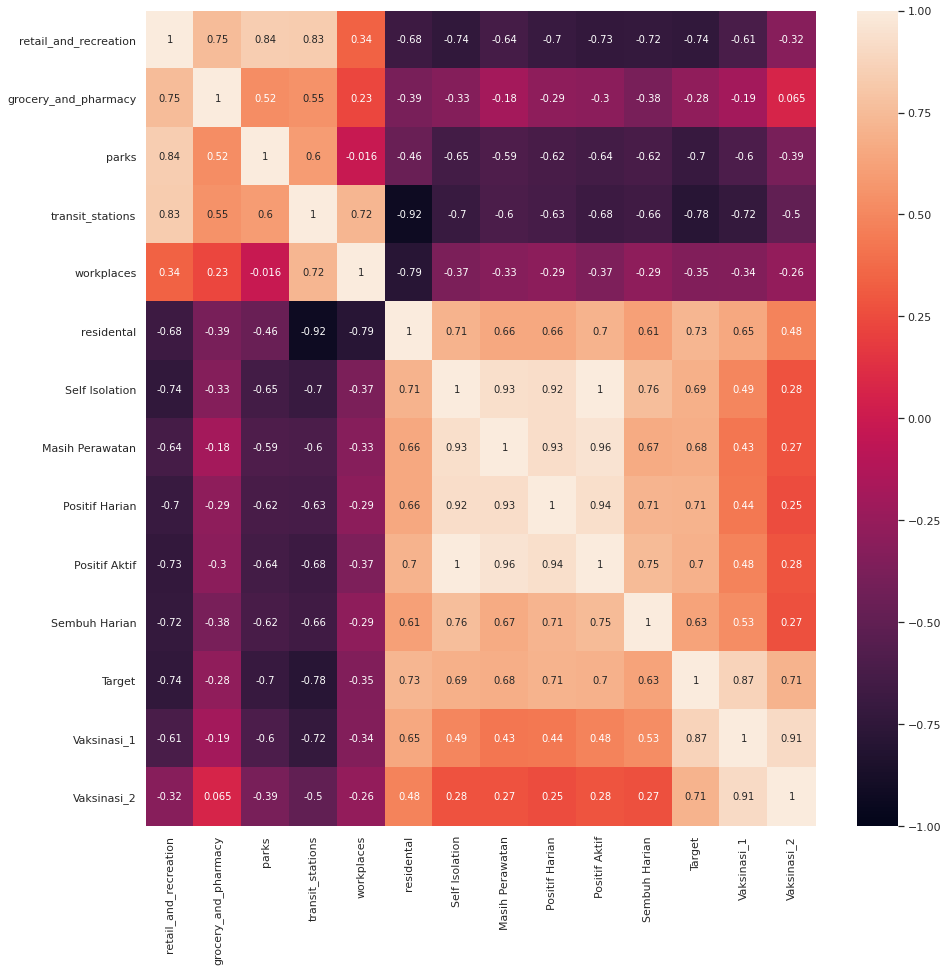

In [256]:
fig , ax = plt.subplots(figsize=(15,15))
sns.set(rc={'figure.figsize': (12,8)})
sns.heatmap(data_jakarta.corr(),annot = True, vmin=-1, vmax=1 ,annot_kws={'size': 10})

Berkorelasi dengan Positif Harian :
- retail_and_recreation
- parks
- transit_stations
- residental
- Self Isolation
- Masih Perawatan


Berkorelasi dengan Positif Aktif :
- transit_stations
- residental
- Self Isolation
- Masih Perawatan



In [227]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
import plotly.graph_objs as go

Positif Harian

In [228]:
trace1 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["Positif Harian"],
                    mode = "lines",
                    name = "Positif Harian",
                    marker = dict(color = 'red'),
)
trace2 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["Self Isolation"],
                    mode = "lines",
                    name = "Self Isolation",
                    marker = dict(color = 'orange'),
)
data = [trace1,trace2]
layout = dict(title = 'Positif Harian vs Self Isolation',
              xaxis = dict(title='Tanggal')
              )
fig = dict(data = data, layout = layout)
iplot(fig)

In [244]:
trace1 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta['Positif Harian'],
                    mode = "lines",
                    name = "Positif Harian",
                    marker = dict(color = 'red'),
)
trace2 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["retail_and_recreation"]*150,
                    mode = "lines",
                    name = "retail_and_recreation",
                    marker = dict(color = 'orange'),
)
trace3 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["parks"]*150,
                    mode = "lines",
                    name = "parks",
                    marker = dict(color = 'green'),
)
trace4 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["transit_stations"]*150,
                    mode = "lines",
                    name = "transit_stations",
                    marker = dict(color = 'blue'),
)
trace5 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["residental"]*150,
                    mode = "lines",
                    name = "residental",
                    marker = dict(color = 'brown'),
)
data = [trace1,trace2,trace3,trace4,trace5]
layout = dict(title = 'Positif Harian vs retail_and_recreation & parks & transit stations & residental (scaled x150)',
              xaxis = dict(title='Tanggal')
              )
fig = dict(data = data, layout = layout)
iplot(fig)

Positif Aktif


In [241]:
trace1 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["Positif Aktif"],
                    mode = "lines",
                    name = "Positif Aktif",
                    marker = dict(color = 'red'),
)
trace2 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["Self Isolation"],
                    mode = "lines",
                    name = "Self Isolation",
                    marker = dict(color = 'orange'),
)
trace3 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["Masih Perawatan"],
                    mode = "lines",
                    name = "Masih Perawatan",
                    marker = dict(color = 'yellow'),
)
data = [trace1,trace2,trace3]
layout = dict(title = 'Positif Aktif vs Self Isolation & Masih Perawatan',
              xaxis = dict(title='Tanggal')
              )
fig = dict(data = data, layout = layout)
iplot(fig)


In [245]:
trace1 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta['Positif Aktif'],
                    mode = "lines",
                    name = "Positif Aktif",
                    marker = dict(color = 'red'),
)
trace2 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["transit_stations"]*150,
                    mode = "lines",
                    name = "transit_stations",
                    marker = dict(color = 'orange'),
)
trace3 = go.Scatter(
                    x = data_jakarta["Tanggal"],
                    y = data_jakarta["residental"]*150,
                    mode = "lines",
                    name = "residental",
                    marker = dict(color = 'green'),
)
data = [trace1,trace2,trace3]
layout = dict(title = 'Positif Harian vs transit stations & residental (scaled x150)',
              xaxis = dict(title='Tanggal')
              )
fig = dict(data = data, layout = layout)
iplot(fig)

### Scatter Plot

### Lag Plot

# <h2> Modelling </h2>